<a href="https://colab.research.google.com/github/bugeki/ML/blob/main/soldier_race_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='latin-1')

In [ ]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq', encoding='latin-1')

## Explore Data

In [ ]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [ ]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,...,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,...,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,...,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,...,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,...,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right ha

In [ ]:
df_male.shape

(4082, 108)

In [ ]:
df_female.shape

(1986, 108)

In [ ]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [ ]:
df = pd.concat([df_male,df_female], axis=0, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN


In [ ]:
df.shape

(6068, 109)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, subjectid to SubjectId
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [ ]:
df.isna().any().sum()

3

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df["DODRace"].value_counts())

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


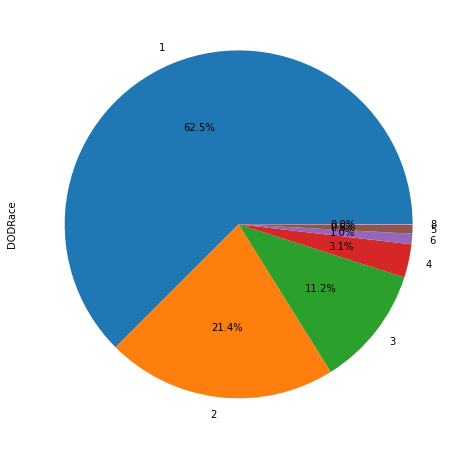

In [ ]:
df["DODRace"].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%');

In [ ]:
drop_list =[]
for col in df:
  if df[col].isna().sum()>1800:
    print(f"{col} = {df[col].isna().sum()}")
    drop_list.append(col)
  
  
drop_list 

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [ ]:
df.drop(drop_list, axis=1, inplace=True)

In [ ]:
df.isnull().any().sum()

0

In [ ]:
df.shape

(6068, 106)

In [ ]:
# to see unique values to find categoric features (for dummy)
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [ ]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8])

In [ ]:
df["DODRace"] = df.DODRace.map({                                     ## will drop after 3, no sufficient data, target is DODrace(hispanic), multi class(3) problem,
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [ ]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: DODRac

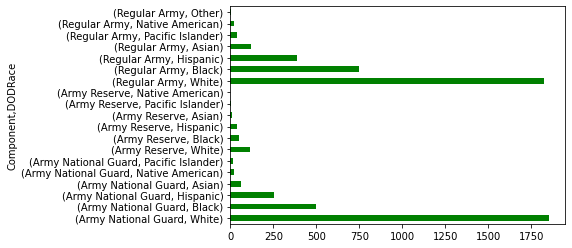

In [ ]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh",colormap='ocean');

In [ ]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White

In [ ]:
drop_list1 = [                                                          ### dont need these features for race
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin"   
]

df.drop(drop_list1, axis=1, inplace=True)

In [ ]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength',
       'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength',
       'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion',
       'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference',
      

In [ ]:
df.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [ ]:
df.drop("SubjectNumericRace",axis=1,inplace=True) ## no need , DOD race enough

In [ ]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [ ]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") |
                (df["DODRace"] == "Hispanic")]
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
df.reset_index(drop=True, inplace=True)

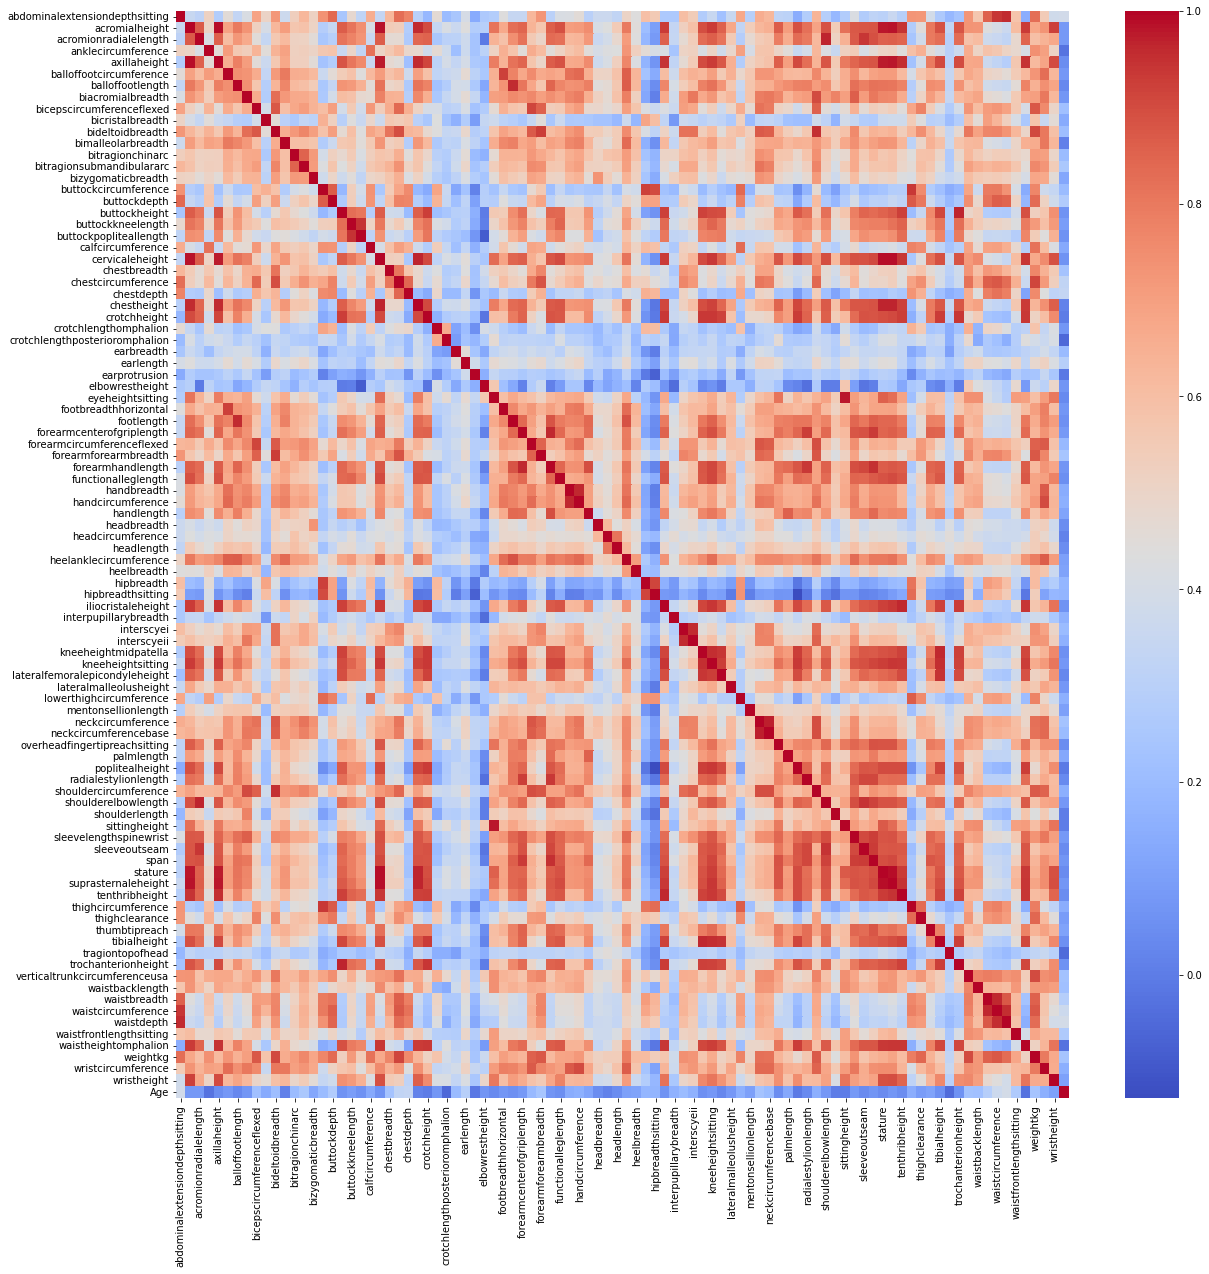

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="coolwarm")

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
X = df.drop("DODRace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)          ##convert caegorical data if log, knn, svm get dummies, if DT then ordinal encoding
y = df.DODRace

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]    ### classweight balance: all data has 2/3 class of sample size diff according to classes, low size mulplied by a number to have same effect as high sized ,  (here 3 clases, white, black..)
pipe_log_model = Pipeline(steps=operations)                                                                                         ### imbalaced data : fraud detection , need to find rare events

In [ ]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)                 ### recall is imp, due to try to find a class

Test_Set
[[240  13   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  21  456   66]
 [  58  355 2621]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [ ]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.599993
test_precision_Hispanic    0.492007
test_recall_Hispanic       0.771481
dtype: float64

test_f1_Hispanic           0.599993

test_precision_Hispanic    0.492007

test_recall_Hispanic       0.771481


--------------close results as test values:--------

 Hispanic       0.52      0.82      0.64       136


### Logistic Model GridsearchCV

In [ ]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])      ##Gridsearch we can write only one scoring, but Crossvalidation 3,5..
                                                                                    ## recall chosen as evaluation metric for tuning
                                                                                    ##recall is becasue to find hispanics
                                                                                    ## accuracy is mean of the three recall, f1, precis

In [ ]:
param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,                                                ### çözümün raporunun görünme sayısı
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [ ]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [ ]:
log_model_grid.best_score_

0.7697757390417942

In [ ]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  21  456   66]
 [  58  355 2621]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



hispanic results; 52,82,64

same as before because we used default for GridS

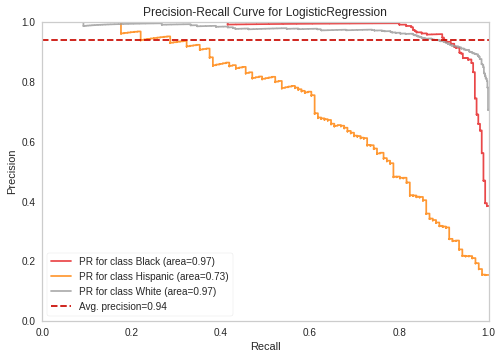

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

hispanic results no good

In [ ]:
viz.score_#["Hispanic"] 

{'Black': 0.974186577359066,
 'Hispanic': 0.733221943462169,
 'White': 0.9713928465306876,
 'micro': 0.9380957678120505}

In [ ]:
y_pred = log_model_grid.predict(X_test)                          ###these are values to compare with other technics

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Lojistic Regression solver "liblenear" for small dataset

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)

In [ ]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[246   3  11]
 [  5  96  35]
 [ 19  33 706]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93       260
    Hispanic       0.73      0.71      0.72       136
       White       0.94      0.93      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 973   19   46]
 [  30  385  128]
 [  44  147 2843]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.70      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.644959
test_precision_Hispanic    0.662196
test_recall_Hispanic       0.631380
dtype: float64

## 2. SVC   (SVC + SVR = SVM)

### Vanilla SVC model 

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [ ]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [  5 111  20]
 [ 22 107 629]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.48      0.82      0.61       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 959   41   38]
 [  22  452   69]
 [  53  422 2559]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [ ]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.571221
test_precision_Hispanic    0.457893
test_recall_Hispanic       0.762256
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [ ]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [ ]:
svm_model_grid.best_score_

0.764186204553177

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  10  10]
 [  5 111  20]
 [ 22  92 644]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 968   36   34]
 [  19  462   62]
 [  55  371 2608]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.85      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.87      0.88      4615



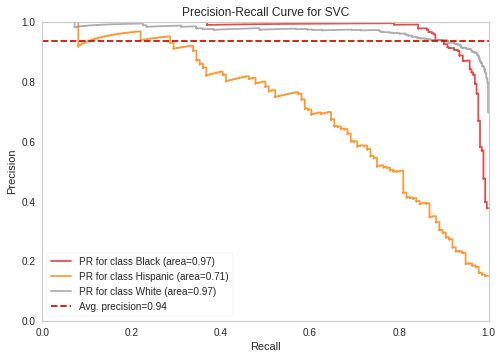

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [ ]:
from sklearn.preprocessing import OrdinalEncoder             ### not get dummies , ordinal is used

In [ ]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [ ]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,21,2.0


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [ ]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [ ]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [ ]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)     ### train 1, test 0,04 very overfit

Test_Set
[[192   1  67]
 [  9   5 122]
 [ 11   0 747]]
              precision    recall  f1-score   support

       Black       0.91      0.74      0.81       260
    Hispanic       0.83      0.04      0.07       136
       White       0.80      0.99      0.88       758

    accuracy                           0.82      1154
   macro avg       0.85      0.59      0.59      1154
weighted avg       0.83      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.082574
test_precision_Hispanic    0.775000
test_recall_Hispanic       0.044242
dtype: float64

### RF Model GridsearchCV

In [ ]:
param_grid = {'n_estimators':[100,150,200],
             'max_depth':[1,2,4,5]}        #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
                                             ### sınıra gelirse 10 a 10 altına denemek lazım sınırdan kurtarmak için 
             

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [ ]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
rf_grid_model.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [ ]:
rf_grid_model.best_score_

0.6537206931702345

In [ ]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)   ## what thses results mean? overfit?

Test_Set
[[157  66  37]
 [ 12  82  42]
 [ 96 280 382]]
              precision    recall  f1-score   support

       Black       0.59      0.60      0.60       260
    Hispanic       0.19      0.60      0.29       136
       White       0.83      0.50      0.63       758

    accuracy                           0.54      1154
   macro avg       0.54      0.57      0.51      1154
weighted avg       0.70      0.54      0.58      1154


Train_Set
[[ 587  307  144]
 [  42  357  144]
 [ 267 1251 1516]]
              precision    recall  f1-score   support

       Black       0.66      0.57      0.61      1038
    Hispanic       0.19      0.66      0.29       543
       White       0.84      0.50      0.63      3034

    accuracy                           0.53      4615
   macro avg       0.56      0.57      0.51      4615
weighted avg       0.72      0.53      0.58      4615



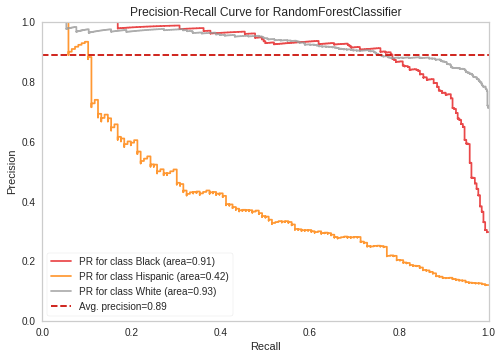

In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
### modelin içine classweght yazamıyoruz, binary de yapıyor ama multi de yapamıyoruz önce class weight hesaplanıyor, sonra sample_weight=classes_weights yazıp aşağıda balance olmasını böyle sağlıyoruz

In [ ]:
#!pip install xgboost==0.90

In [ ]:
import xgboost as xgb

xgb.__version__

'0.90'

In [ ]:
xgb_model = XGBClassifier(random_state=101)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [ ]:
comp = pd.DataFrame(classes_weights)                                ## her sınıf için class weight e bakıyoruz
                                                                    ### biantry de daha kolay bu iş:  scale_pos_weight kullanılıyor (positive ve negatif weightler için)
comp["label"] = y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [ ]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

XGBClassifier(objective='multi:softprob', random_state=101)

In [ ]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[229  11  20]
 [ 10  90  36]
 [ 44 106 608]]
              precision    recall  f1-score   support

       Black       0.81      0.88      0.84       260
    Hispanic       0.43      0.66      0.52       136
       White       0.92      0.80      0.86       758

    accuracy                           0.80      1154
   macro avg       0.72      0.78      0.74      1154
weighted avg       0.84      0.80      0.81      1154


Train_Set
[[ 977   27   34]
 [  15  471   57]
 [  79  323 2632]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1038
    Hispanic       0.57      0.87      0.69       543
       White       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [ ]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.518818
test_precision_Hispanic    0.438450
test_recall_Hispanic       0.636936
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {"n_estimators":[50, 100],
              'max_depth':[1,2],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.8, 1],
              "colsample_bytree":[0.8, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 1,
 'n_estimators': 100,
 'subsample': 0.8}

In [ ]:
xgb_grid_model.best_score_

0.6501529051987768

In [ ]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)     ### RF ile benzer sonuçlar, ağaç yapıları benzer oluyor, parallel işlem yaptığı için hızlı sadece

Test_Set
[[221  21  18]
 [ 15  86  35]
 [ 54 140 564]]
              precision    recall  f1-score   support

       Black       0.76      0.85      0.80       260
    Hispanic       0.35      0.63      0.45       136
       White       0.91      0.74      0.82       758

    accuracy                           0.75      1154
   macro avg       0.67      0.74      0.69      1154
weighted avg       0.81      0.75      0.77      1154


Train_Set
[[ 908   69   61]
 [  38  402  103]
 [ 136  524 2374]]
              precision    recall  f1-score   support

       Black       0.84      0.87      0.86      1038
    Hispanic       0.40      0.74      0.52       543
       White       0.94      0.78      0.85      3034

    accuracy                           0.80      4615
   macro avg       0.73      0.80      0.74      4615
weighted avg       0.85      0.80      0.81      4615



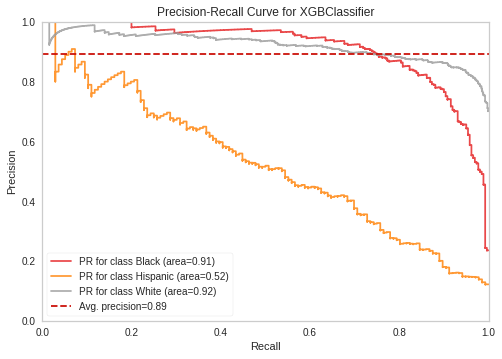

In [ ]:
model = XGBClassifier(learning_rate=0.3, max_depth=1,
              random_state=101, subsample=0.8)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

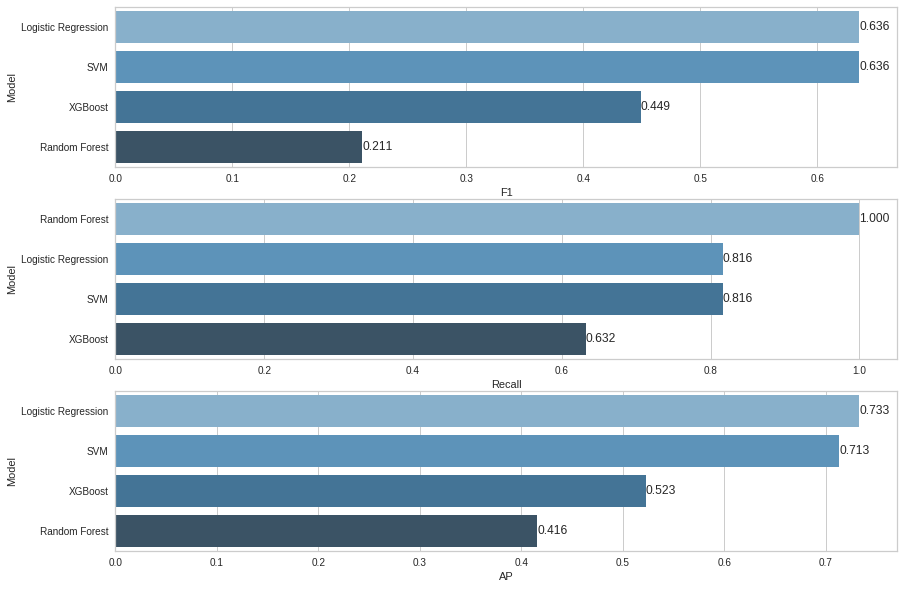

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [ ]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,...,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthLocation_South Africa,SubjectsBirthLocation_South America,SubjectsBirthLocation_South Carolina,SubjectsBirthLocation_South Dakota,SubjectsBirthLocation_South Korea,SubjectsBirthLocation_Sri Lanka,SubjectsBirthLocation_Sudan,SubjectsBirthLocation_Syria,SubjectsBirthLocation_Tennessee,SubjectsBirthLocation_Texas,SubjectsBirthLocation_Togo,SubjectsBirthLocation_Trinidad and Tobago,SubjectsBirthLocation_Turkey,SubjectsBirthLocation_US Virgin Islands,SubjectsBirthLocation_Ukraine,SubjectsBirthLocation_United Kingdom,SubjectsBirthLocation_United States,SubjectsBirthLocation_Utah,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,...,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.00000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000
mean,247.254290,1408.630265,328.071590,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.677760,139.529381,1022.059456,242.234356,872.112845,610.449991,498.331773,386.316519,1479.952158,283.232623,1024.206622,252.322586,1254.290172,827.1057

In [ ]:
mean_human = X.describe().loc["mean"]            ### tüm değerlerin ortalamasını alıp modele girince white çıktı
mean_human

abdominalextensiondepthsitting      247.254290
acromialheight                     1408.630265
acromionradialelength               328.071590
anklecircumference                  225.201768
axillaheight                       1301.902583
                                      ...     
SubjectsBirthLocation_Wisconsin       0.017161
SubjectsBirthLocation_Wyoming         0.001213
SubjectsBirthLocation_Zambia          0.000173
WritingPreference_Left hand           0.107818
WritingPreference_Right hand          0.881955
Name: mean, Length: 232, dtype: float64

In [ ]:
final_model.predict([mean_human])

array(['White'], dtype=object)

In [ ]:
y[201]

'Hispanic'

In [ ]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef              ### -1,1 arası 0 ise random, 1 ise güzel model, muticlass için

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7827657214688859

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7737579800746648

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
### imbalance için bir teknik ama işe yaramıyor gibi, ama bilelim, class weight e katsayı veriyorduk burada ise augmentation az olna data sentetik olarak çoğaltılıyor, sınır bölgeleri de çoğaldığı için karışıklık da artıyor
##classweight daha iyi çalışıyor

## down sampling veri azaltıryor
upsampling ise artırıyor ,  over = up, under = down

In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)

In [ ]:
X_over.shape

(9102, 232)

In [ ]:
y_over.value_counts()

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [ ]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [ ]:
X_under.shape

(1629, 232)

In [ ]:
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [ ]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [ ]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [ ]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)                                                         ### kendi pipeline ı var oınu kullanıyoruz

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [ ]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [ ]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))]

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[235   8  17]
 [  5  87  44]
 [ 13  35 710]]
              precision    recall  f1-score   support

       Black       0.93      0.90      0.92       260
    Hispanic       0.67      0.64      0.65       136
       White       0.92      0.94      0.93       758

    accuracy                           0.89      1154
   macro avg       0.84      0.83      0.83      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[ 952   29   57]
 [  25  346  172]
 [  24  121 2889]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.70      0.64      0.67       543
       White       0.93      0.95      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.84      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.622976
test_precision_Hispanic    0.653683
test_recall_Hispanic       0.596364
dtype: float64

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.0

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.0

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap                       ### feature importance ı ve hangi class a etkisi var onu gösteriyor

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___